# Assignment 2 - Machine Learning
**Project:** Project 1 - Classify Images of Road Traffic Signs

**Group Name:** Dan & Ethan
| Name               | Student Number |
|--------------------|----------------|
| Daniel Schellekens | s3900792       |
| Ethan Rayner       | s3902240       |

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

TEST_TRAIN_SPLIT = 0.2

from models.utils import prep_data

data, train_data, val_data = prep_data(IMAGES_FILE, TEST_TRAIN_SPLIT)

Test set: 2959 rows
Validation set: 740 rows


In [2]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

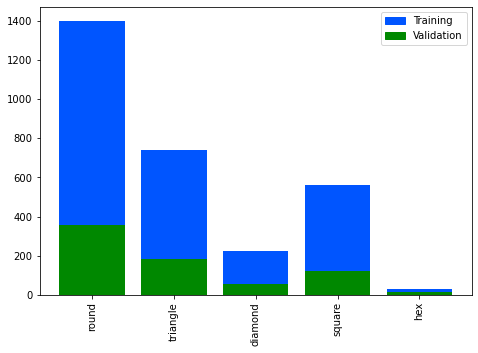

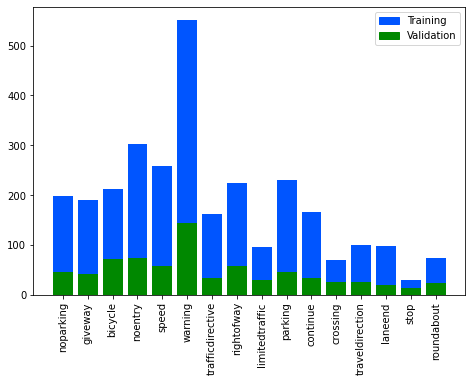

In [3]:
OUTPUT_CLASSES = 16
from models.eda import classes_histogram

classes_histogram(train_data, val_data, "shape")
classes_histogram(train_data, val_data, "type")

In [4]:
CLASS_COLUMN = "type"
BATCH_SIZE = 32
EPOCHS = 100

import models.MLP as mlp
from models.utils import history_graph
from models.utils import create_generator

mlp_train_images = create_generator(train_data, CLASS_COLUMN, IMAGE_SIZE, BATCH_SIZE)
mlp_val_images = create_generator(val_data, CLASS_COLUMN, IMAGE_SIZE, BATCH_SIZE)
mlp_model, mlp_history = mlp.fit_model(data, CLASS_COLUMN, mlp_train_images, mlp_val_images, IMAGE_SIZE, EPOCHS)
history_graph(mlp_history)

NameError: name 'train_data' is not defined

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'), #Maybe I can change the hidden layer to see if i can make it more accurate
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', #this used to be SGD and idk if i can just change it to adam without changing other stuff but the results look better
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [ ]:
#levels out around 30 epochs
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

c:\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In [ ]:
# Not sure how i feel about this curve

plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
test_data['type'] = test_data['type'].astype('str') ##I'm guessing test data will end up being our test data

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
model.evaluate(validation_generator)

In [ ]:
label_names = {'rightofway' : 0, 'stop' : 1, 'bicycle' : 2, 'limitedtraffic' : 3, 'noentry' : 4, 'noparking' : 5, 'roundabout' : 6, 'speed' : 7, 'trafficdirective' : 8, 'traveldirection' : 9, 'continue' : 10, 'crossing' : 11, 'laneend' : 12, 'parking' : 13, 'giveway' : 14, 'warning' : 15}

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 10:
            plt.subplot(1,10,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(np.argmax(y[0]), np.argmax(y_hat[0]) ))
            
        else:
            break
        
        plt.axis('off')

        # 0 - bicycle
        # 1 - continue
        # 2 - crossing
        # 3 - giveway
        # 4 - laneend
        # 5 - limitedtraffic
        # 6 - noentry
        # 7 - noparking
        # 8 - parking
        # 9 - rightofway
        # 10 - roundabout
        # 11 - speed
        # 12 - stop
        # 13 - trafficdirective
        # 14 - traveldirection
        # 15 - Warning
        